**Harris Corner Detection**
https://docs.opencv.org/3.4/dc/d0d/tutorial_py_features_harris.html

In [ ]:
import numpy as np
import cv2 as cv
from google.colab.patches import cv2_imshow

In [ ]:
filename = 's1.png'
img = cv.imread(filename)
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

In [ ]:
gray = np.float32(gray)
dst = cv.cornerHarris(gray,2,3,0.04)

#result is dilated for marking the corners, not important
dst = cv.dilate(dst,None)

In [ ]:
# Threshold for an optimal value, it may vary depending on the image.
img[dst>0.01*dst.max()]=[0,0,255]

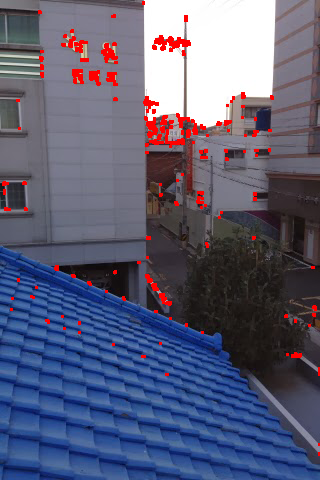

In [ ]:
cv2_imshow(img)
if cv.waitKey(0) & 0xff == 27:
    cv.destroyAllWindows()

Corner with SubPixel Accuracy

In [ ]:
# find Harris corners
gray = np.float32(gray)
dst = cv.cornerHarris(gray,2,3,0.04)
dst = cv.dilate(dst,None)
ret, dst = cv.threshold(dst,0.01*dst.max(),255,0)
dst = np.uint8(dst)

In [ ]:
# find centroids
ret, labels, stats, centroids = cv.connectedComponentsWithStats(dst)

In [ ]:
# define the criteria to stop and refine the corners
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.001)
corners = cv.cornerSubPix(gray,np.float32(centroids),(5,5),(-1,-1),criteria)

In [ ]:
# Draw them
res = np.hstack((centroids,corners))
res = np.int0(res)
img[res[:,1],res[:,0]]=[0,0,255]
img[res[:,3],res[:,2]] = [0,255,0]
cv.imwrite('subpixel5.png',img)

True

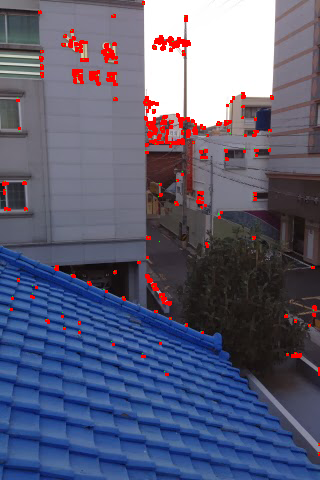

In [ ]:
cv2_imshow(img)
if cv.waitKey(0) & 0xff == 27:
    cv.destroyAllWindows()